In [1080]:
import pandas as pd
from tqdm import tqdm_notebook
import itertools

In [1081]:
data = pd.read_csv('/data/wujipeng/ec/data/han/processed_data.csv')
data

,id,clause,nature,keyword,emotion,clause_pos,label
0,1,当 我 看到 建议 被 采纳  部委 领导 写给 我 的 回信 时  我 知道 我 正在...,p r v n p v  n n v r u n q  r v r d p r n u ...,激动,0,63 64 65 66 67 68 69 70 71,0 0 0 0 0 0 0 0 1
1,2,据 白金跃 介绍  自 1988 年 至今  他 向 国家 各部委 提出 合理化 建议 ...,p n v  p m q d  r p n n v v n m a q  c m p ...,激动,0,61 62 63 64 65 66 67 68 69,0 0 0 0 0 0 0 1 0
2,3,2002 年 6月 3 日 上午  当值 的 曾友蔚 接报  狮山镇 小塘 走马 营村 ...,m q t m b t  n u n v  n n n n m n f v m q n ...,心疼,3,58 59 60 61 62 63 64 65 66 67 68 69 70 71 72,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
3,4,为 尽快 将 女子 救下  指挥员 立即 制订 了 救援 方案  第一 组 在 楼下 铺...,p d d n v  n d v u v n  m n p s v v n  c p ...,无奈,3,58 59 60 61 62 63 64 65 66 67 68 69,0 0 0 0 0 0 0 0 1 1 1 0
4,5,依靠 父母 支持 和 在 学校 打工 积攒 下来 的 钱  两 人 共 投资 50 多 万...,v n v c p n v v v u n  m n d v m a q  v u n ...,自豪,0,63 64 65 66 67 68 69,0 0 0 0 0 1 0
5,6,2013 年 6月  在 深圳 打拼 10 年 的 吴树梁 终于 拿到 大红 的 深圳市 ...,m q t  p n v m q u n d v b u n n  n n d d v ...,欣喜,0,64 65 66 67 68 69 70 71 72 73 74 75,0 0 0 0 0 1 0 0 0 0 0 0
6,7,2013 年 6月  在 深圳 打拼 10 年 的 吴树梁 终于 拿到 大红 的 深圳市 ...,m q t  p n v m q u n d v b u n n  n n d d v ...,忧虑,3,61 62 63 64 65 66 67 68 69 70 71 72,0 0 0 0 0 0 0 0 0 0 0 1
7,8,生不如死 是 老吴 患癌 后 常有 的 想法  由于 大面积 骨转移  老吴 每天 都 ...,l v n n f d u n  p d n  n t d p n f v  p m ...,生不如死,5,69 70 71 72 73 74 75 76,0 1 1 0 0 0 0 0
8,9,生不如死 是 老吴 患癌 后 常有 的 想法  由于 大面积 骨转移  老吴 每天 都 ...,l v n n f d u n  p d n  n t d p n f v  p m ...,惊诧,6,62 63 64 65 66 67 68 69,0 0 0 0 1 0 1 0
9,10,为了 坚持 到 妻子 入户  老吴 已经 用尽 了 全力  老吴 因为 其 抗癌 事迹 ...,p v v n v  n d v u d  n c r v n l  c n n d ...,担心,4,65 66 67 68 69 70 71 72 73 74 75 76,0 0 0 1 0 0 0 0 0 0 0 0


# 规则

## Cause Event Markers

In [3]:
# load_vocab:
import os
with open(os.path.join('/data/wujipeng/ec/data/raw_data/vocab.txt'), 'r') as f:
    word_unk = f.readline().strip()
    vocab = ['<pad>', word_unk] + f.readline().strip().split(' ')
i2w = {i: w for i, w in enumerate(vocab)}
w2i = {w: i for i, w in enumerate(vocab)}

In [1082]:
corpus = []
with open('/data/wujipeng/ec/data/raw_data/corpus.txt') as f:
    for line in f.readlines():
        corpus.append(line.strip())

In [5]:
markers = [
    ['让', '令', '使'],
    ['想到', '想起', '一想', '想来', '说到', '说起', '一说', '讲到', '讲起', '一讲', '谈到', '谈起', '一谈', '提到', '提起', '一提'],
    ['说', '的说', '道'],
    ['看', '看到', '看见', '见到', '见', '眼看', '瞧见', '听', '听到', '听说', '知道', '得知', '得悉', '获知', '获悉', '发现', '发觉', '有'],
    ['为', '为了', '对', '对于'],
    ['因', '因为', '由于'],
    ['的是', '于', '能']
]

In [6]:
miss, cnt = 0, 0
miss_words = []
for marker in markers:
    for word in marker:
        if not w2i.get(word):
            miss_words.append(word)
            miss += 1
        cnt += 1
print('miss ratio: ', miss/cnt)
print('miss words: ', miss_words)

miss ratio:  0.22
miss words:  ['一想', '说到', '一说', '讲到', '一讲', '一谈', '一提', '的说', '瞧见', '得悉', '的是']


In [7]:
word_idx = dict(zip(miss_words, [[] for _ in miss_words]))
for idx, line in enumerate(corpus):
    for word in miss_words:
        if word in line.replace(' ', ''):
            word_idx[word].append(idx)

In [8]:
for word, idx in word_idx.items():
    print(word, idx)

一想 [631, 795, 870, 880, 881, 1098, 1170, 1171, 1509, 1593, 1636, 2015, 2079]
说到 [43, 44, 101, 417, 423, 584, 585, 622, 760, 761, 762, 1160, 1360, 1667, 1695, 1935]
一说 [72, 269, 270, 302, 394, 691, 790, 827, 886, 1979, 2010, 2055]
讲到 []
一讲 []
一谈 []
一提 [448]
的说 [208, 619, 620, 936, 996, 1144, 1782, 2047]
瞧见 []
得悉 []
的是 [30, 31, 41, 42, 98, 108, 180, 191, 196, 198, 212, 226, 232, 236, 237, 247, 248, 257, 272, 273, 275, 280, 352, 374, 393, 399, 400, 415, 437, 440, 458, 489, 490, 495, 496, 498, 502, 517, 523, 560, 601, 603, 619, 620, 646, 671, 672, 676, 694, 705, 713, 714, 717, 718, 723, 724, 756, 773, 790, 801, 807, 808, 812, 830, 831, 864, 868, 878, 894, 913, 921, 934, 935, 939, 940, 946, 958, 968, 972, 978, 984, 997, 1019, 1022, 1025, 1035, 1044, 1054, 1058, 1063, 1070, 1091, 1092, 1093, 1111, 1127, 1130, 1144, 1157, 1159, 1163, 1164, 1191, 1196, 1198, 1199, 1208, 1211, 1217, 1245, 1247, 1248, 1258, 1260, 1261, 1272, 1273, 1277, 1287, 1292, 1316, 1322, 1339, 1340, 1341, 1350, 1362, 1373,

## markers

In [1083]:
# 删去 讲到 一讲 一谈 瞧见 得悉
markers = [
    ['让', '令', '使'],
    ['想到', '想起', '一想', '想来', '说到', '说起', '一说', '讲起', '谈到', '谈起', '提到', '提起', '一提'],
    ['说', '的说', '道'],
    ['看', '看到', '看见', '见到', '见', '眼看', '听', '听到', '听说', '知道', '得知', '获知', '获悉', '发现', '发觉', '有'],
    ['为', '为了', '对', '对于'],
    ['因', '因为', '由于'],
    ['的是', '于', '能']
]

## Find word

In [10]:
pos0 = 69
row = data.loc[2023]
clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
keyword = row['keyword'].replace(' ', '')
clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
print(keyword)

难受


In [42]:
# test find_word
sentence = ['我', '爱', '北京', '天安门', '，', '天安门', '前', '太阳', '升']
find_word('太阳升', sentence)

(7, 8)

In [1084]:
# find word
def find_word(keyword, sentence, start=0, end=-1, strict=False):
    """
    word: str 'abc'
    sentence: list ['a', 'b', 'cd']
    return: start_index, end_index: 0, 2
    """
    if not sentence:
        return -1, -1
    if end == -1 or end > len(sentence):
        end = len(sentence)
    if keyword in sentence[start:end]:
        return sentence.index(keyword, start, end), sentence.index(keyword, start, end)
    elif strict:
            return -1, -1
    else:
        s, e = -1, -1
        sentence = sentence[start: end]
        idx = ''.join(sentence).find(keyword)
        if idx >= 0:
            l = -1
            for i, word in enumerate(sentence):
                word = sentence[i]
                l += len(word)
                if l >= idx and s < 0:
                    s = i + start
                if l >= idx+len(keyword)-1:
                    e = i + start
                    break
    return s, e

In [1085]:
# rfind word
def rfind_word(keyword, sentence, start=0, end=-1, strict=False):
    """
    word: str 'word'
    sentence: list ['a', 'b', 'cd']
    """
    if not sentence:
        return -1, -1
    if end == -1 or end > len(sentence):
        end = len(sentence)
    s, e = find_word(keyword[::-1], [word[::-1] for word in sentence[::-1]], len(sentence)-end, len(sentence)-start, strict)
    if s == -1 or e == -1:
        return s, e
    return len(sentence)-e-1, len(sentence)-s-1

In [288]:
# test find_word
import random
pos0 = 69
for i in range(len(data)):
# for i in range(631, 632):
#     sample = random.randint(0, len(data))
    row = data.loc[i]
    clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
    natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
    keyword = row['keyword'].replace(' ', '')
    clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
    
    key_clause = clauses[clause_pos.index(0)]
    s, e = find_word(keyword, key_clause)
    if keyword not in ''.join(key_clause[s: e+1]):
        print(i)
#     print(keyword, key_clause[s: e+1])

In [266]:
keyword, key_clause

('没有人性', ['太', '没有', '人性'])

In [284]:
rs = set()
for i in range(len(data)):
    row = data.loc[i]
    clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
    natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
    for j in range(len(clauses)):
        for k in range(len(clauses[j])):
            if natures[j][k] == 'r':
                rs.add(clauses[j][k])

In [34]:
# 代词 ≈ 名词
list(rs)

['怎么着',
 '那个',
 '这时候',
 '怎么办',
 '这天',
 '这家',
 '这幅',
 '哪个',
 '她',
 '那一刻',
 '大家',
 '一切',
 '您',
 '这边',
 '何处',
 '该地',
 '该项',
 '之一',
 '后者',
 '彼此',
 '其余',
 '本月',
 '什么样',
 '这时',
 '自家',
 '这次',
 '她俩',
 '如何',
 '他',
 '那年',
 '此事',
 '其子',
 '该',
 '其中',
 '此言',
 '咋',
 '这段',
 '该村',
 '那种',
 '它们',
 '她们',
 '其它',
 '这间',
 '那天',
 '我俩',
 '本村',
 '这么久',
 '其父',
 '啥子',
 '多久',
 '大伙儿',
 '那场',
 '这下',
 '那晚',
 '该条',
 '之事',
 '该是',
 '此人',
 '此案',
 '本案',
 '有人',
 '她家',
 '那儿',
 '该院',
 '咱们',
 '其他人',
 '有的',
 '那日',
 '本人',
 '各',
 '这般',
 '之身',
 '谁',
 '这块',
 '那些',
 '自己',
 '各界',
 '该局',
 '我会',
 '任何',
 '这儿',
 '你们',
 '有些',
 '谁家',
 '该户',
 '某',
 '其妻',
 '多少',
 '这场',
 '这么',
 '剩女',
 '两者',
 '每间',
 '本报',
 '如家',
 '那次',
 '各科',
 '之日',
 '怎',
 '他家',
 '本身',
 '如一',
 '该科',
 '该县',
 '之路',
 '何',
 '另',
 '何方',
 '之家',
 '咱',
 '那块',
 '各个',
 '那',
 '那位',
 '那家',
 '别下',
 '芳心',
 '其他',
 '该报',
 '为啥',
 '这他',
 '一己',
 '各处',
 '俺家',
 '之举',
 '某某',
 '这批',
 '那份',
 '某次',
 '这种',
 '自我',
 '他乡',
 '本书',
 '这事',
 '本文',
 '之余',
 '此间',
 '任何人',
 '该校',
 '有点儿',
 '咱俩',
 '各类',
 '此次',
 '

## data process

In [8]:
# 数据
pos0 = 69
for i in range(len(data)):
    row = data.loc[i]
    clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
#     natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
    # r -> n
    natures = [[n if n != 'r' else 'n' for n in nature.strip().split(' ')] for nature in row['nature'].split('\x01')]
    keyword = row['keyword'].replace(' ', '')
    clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]

    f = clause_pos.index(0)
    K = keyword

In [9]:
# params f, clauses, natures, K,
b, a = f-1, f+1
B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
B, F, A, BN, FN, AN, K

(['向', '波', '找到', '张迎春', '借钱', '救急', '对方', '没借'],
 ['向', '波', '于是', '对', '张', '心生', '怨恨'],
 ['并', '想', '找', '机会', '好好', '教训', '一下', '他'],
 ['p', 'n', 'v', 'n', 'v', 'v', 'n', 'v'],
 ['p', 'n', 'c', 'p', 'q', 'n', 'v'],
 ['c', 'v', 'v', 'n', 'd', 'n', 'm', 'n'],
 '怨恨')

## Sophia-A Text-driven Rule-based System for Emotion Cause Detection, 2010

### rule 1

1. C(B/F) + I(F) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh after I in F
3. C = the nearest (N)+(V)+(N) before I in F/B

I: *'让', '令', '使'* <br>
constraint: the K cannot be followed by the words "的"/"的是"/"是"

In [1086]:
# params f, clauses, natures, K,
def rule1(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # constraint
    constraint_words = ['的', '的是', '是']
    for word in constraint_words:
        c_s, c_e = find_word(word, F, k_e, -1)
        if c_s > -1:
            return
    
    cues = markers[0] # I
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1:
            I = word
            # 找情感对象
            e_s, e_e = find_word('n', FN, i_e, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 在当前句找情感原因
                c_s, c_e = rfind_word('nvn', FN, 0, i_s+1)
                if c_s > -1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在前一句找情感原因
                    c_s, c_e = rfind_word('nvn', BN)
                    if c_s > -1:
                        C = B[c_s: c_e+1]
                        return ('B', I, E, C)
    return

### rule 2

1. E(B/F) + II/IV/V/VI(B/F) + C(B/F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh after II/IV/V/VI in F
3. C = the nearest (N)+(V)+(N) before K in F

II: *想到, 想起, 一想, 想来, 说到, 说起, 一说, 讲起, 谈到, 谈起, 提到, 提起, 一提* <br>
IV: *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
V:  *为, 为了, 对, 对于* <br>
VI: *因, 因为, 由于* <br>
constraint: the cue word in III '有' is excluded

In [1087]:
# params f, clauses, natures, K,
def rule2(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)

    cues = markers[1] + markers[3] + markers[4] + markers[5] # I
    # constraint
    cues.remove('有')
    for word in cues:
        # 在当前句找线索词
        i_s, i_e = find_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('nvn', FN, i_e, k_s+1)
            if c_s > -1:
                C = F[c_s: c_e+1]
                # 在当前句找情感对象
                e_s, e_e = rfind_word('n', FN, 0, i_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                else:
                    # 在前一句找情感对象
                    e_s, e_e = rfind_word('n', BN)
                    if e_s > -1:
                        E = B[e_s: e_e+1]
                if e_s > -1:
                    return ('F', I, E, C)
        else:
            #在前一句找线索词
            i_s, i_e = find_word(word, B, strict=True)
            if i_s > -1:
                I = B[i_s: i_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', BN, 0, i_s+1)
                if e_s > -1:
                    E = B[e_s: e_e+1]
                    # 在前一句找情感原因
                    c_s, c_e = find_word('nvn', BN, i_e)
                    if c_s > -1:
                        C = B[c_s: c_e+1]
                        return ('B', I, E, C)
                    else:
                        # 在当前句找情感原因
                        c_s, c_e = find_word('nvn', FN, 0, k_s+1)
                        if c_s > -1:
                            C = F[c_s: c_e+1]
                            return ('F', I, E, C)
    return

### rule 3

1. II/IV/V/VI(B) + C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after II/IV/V/VI(B) in B

II: *想到, 想起, 一想, 想来, 说到, 说起, 一说, 讲起, 谈到, 谈起, 提到, 提起, 一提* <br>
IV: *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
V:  *为, 为了, 对, 对于* <br>
VI: *因, 因为, 由于* <br>

In [1118]:
# params f, clauses, natures, K,
def rule3(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)

    cues = markers[1] + markers[3] + markers[4] + markers[5] # I
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, B, strict=strict)
        if i_s > -1:
            I = B[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('nvn', BN, i_e)
            if c_s > -1:
                C = B[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = find_word('n', FN, 0, k_s+1)
                E = F[e_s: e_e+1]
                if e_s > -1:
                    return ('B', I, E, C)
    return

In [1115]:
# test find_word
import random
pos0 = 69
for i in range(len(data)):
# for i in range(631, 632):
#     sample = random.randint(0, len(data))
    row = data.loc[i]
    clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
    natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
    keyword = row['keyword'].replace(' ', '')
    clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
    
    key_clause = clauses[clause_pos.index(0)]
    s, e = find_word(keyword, key_clause)
    if keyword not in ''.join(key_clause[s: e+1]):
        print(i)
#     print(keyword, key_clause[s: e+1])

### rule 4

1. E(B/F) + K(F) + IV/VII(F) + C(F/A)
2. E = a: the nearest Na/Nb/Nc/Nh before K in F; b: the first Na/Nb/Nc/Nh in B
3. C = the nearest (N)+(V)+(N) after IV/VII in F/A

IV:  *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
VII: *的是, 于, 能* <br>
constraint: it only applies to instances containing keywords of happiness, fear, and surprise.

In [1089]:
# params f, clauses, natures, K,
def rule4(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[3] + markers[6]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, k_e, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 在当前句找情感对象
            e_s, e_e = rfind_word('n', FN, 0, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
            else:
                # 在前一句找情感对象
                e_s, e_e = find_word('n', BN)
                if e_s > -1:
                    E = B[e_s: e_e+1]
            if e_s > -1:
                # 在当前句找情感原因
                c_s, c_e = find_word('nvn', FN, i_e)
                if c_s > -1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在下一句找情感原因
                    c_s, c_e = find_word('nvn', AN)
                    if c_s > -1:
                        C = A[c_s: c_e+1]
                        return ('A', I, E, C)
    return

### rule 5

1. E(F) + K(F) + VI(A) + C(A)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after VI in A

VI: *因, 因为, 由于* <br>

In [1090]:
# params f, clauses, natures, K,
def rule5(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[5]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, A, strict=strict)
        if i_s > -1:
            I = A[i_s: i_e+1]
            # 找情感对象
            e_s, e_e = find_word('n', FN, 0, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 找情感原因
                c_s, c_e = find_word('nvn', AN, i_e)
                if c_s > -1:
                    C = A[c_s: c_e+1]
                    return ('A', I, E, C)
    return

### rule 6

1. I(F) + E(F) + K(F) + C(F/A)
2. E = the nearest Na/Nb/Nc/Nh after I in F
3. C = the nearest (N)+(V)+(N) after K in F or A

I: *让, 令, 使* <br>

In [1091]:
# params f, clauses, natures, K,
def rule6(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[0]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感对象
            e_s, e_e = find_word('n', FN, i_e, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 在当前句找情感原因
                c_s, c_e = find_word('nvn', FN, k_e)
                if c_s > -1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在下一句找情感原因
                    c_s, c_e = find_word('nvn', AN)
                    if c_s > -1:
                        C = A[c_s: c_e+1]
                        return ('A', I, E, C)
    return

### rule 7

1. E(B/F) + 越 C 越 K(F)
2. E = the nearest Na/Nb/Nc/Nh before the first 越 in B/F
3. C = the V between the two 越 in F

In [1092]:
# params f, clauses, natures, K,
def rule7(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找到第二个越
    i_s, i_e = rfind_word('越', F, 0, k_s+1)
    if i_s >= k_s-1:
        # 找情感原因
        c_s, c_e = rfind_word('v', FN, 0, i_s+1)
        if c_s > -1:
            C = F[c_s: c_e+1]
            i_s, i_e = rfind_word('越', F, 0, c_s+1)
            if i_s >= c_s-1:
                I = '越..越'
                # 在当前句找情感对象
                e_s, e_e = rfind_word('n', FN, 0, i_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                else:
                    # 在前一句找情感对象
                    e_s, e_e = rfind_word('n', BN)
                    if e_s > -1:
                        E = B[e_s: e_e+1]
                if e_s > -1:
                    return ('F', I, E, C)

### rule 8

1. E(F) + K(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after K in F

In [1093]:
def rule8(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, 0, k_s+1)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = find_word('nvn', FN, k_e)
        if c_s > -1:
            C = F[c_s: c_e+1]
            return ('F', '', E, C)
    return

### rule 9

1. E(F) + IV(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before IV in F
3. C = IV + (an aspectual marker) in F

IV:  *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>

In [1094]:
def rule9(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[3]
    for word in cues:
        # 找线索词
        i_s, i_e = rfind_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1 and k_s-i_e > 1:
            I = F[i_s: i_e+1]
            C = F[i_s: k_s]
            # 找情感对象
            e_s, e_e = rfind_word('n', FN, 0, i_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                return ('F', I, E, C)
    return

### rule 10

1. K(F) + E(F) + 的(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh after K in F
3. C = the nearest (N)+(V)+(N)+的+N after 的 in F

In [1095]:
def rule10(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, k_e)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因开端
        c_s, c_e = find_word('nvn', FN, e_e)
        if c_s > -1:
            # 找到情感原因中的“的”
            d_s, d_e = find_word('的', F, c_e)
            if d_s > -1:
                # 找到情感原因末端
                n_s, c_e = find_word('n', FN, d_e)
                if n_s > -1:
                    C = F[c_s: c_e+1]
                    # 找到第一个的
                    i_s, i_e = find_word('的', F, e_e, c_s+1)
                    if i_s > -1:
                        I = '的'
                        return ('F', I, E, C)
    return

### rule 11

1. C(F) + K(F) + E(F)
2. E = the nearest Na/Nb/Nc/Nh after K in F
3. C = the nearest (N)+(V)+(N) before K in F

In [1096]:
def rule11(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感原因
    c_s, c_e = rfind_word('nvn', FN, 0, k_s)
    if c_s > -1:
        C = F[c_s: c_e+1]
        # 找情感对象
        e_s, e_e = find_word('n', FN, k_e)
        if e_s > -1:
            E = F[e_s: e_e+1]
            return ('F', '', E, C)
    return

### rule 12

1. E(F) + K(F) + III(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after III in F

III: *说, 的说, 道* <br>

In [1097]:
def rule12(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[2]
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, k_e, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('nvn', FN, i_e)
            if c_s > -1:
                C = F[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', FN, 0, k_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                    return ('F', I, E, C)
    return

### rule 13

1. III(B) + C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after III in B

III: *说, 的说, 道* <br>

In [1098]:
def rule13(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[2]
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, B, strict=strict)
        if i_s > -1:
            I = B[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('nvn', BN, i_e)
            if c_s > -1:
                C = B[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', FN, 0, k_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                    return ('B', I, E, C)
    return

### rule 14

1. C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) before K in B

In [1099]:
def rule14(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, 0, k_s+1)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = rfind_word('nvn', BN)
        if c_s > -1:
            C = B[c_s: c_e+1]
            return ('B', '', E, C)
    return

### rule 15

1. E(B) + C(B) + K(F)
2. E = the first Na/Nb/Nc/Nh in B
3. C = the nearest (N)+(V)+(N) before K in B

In [1100]:
def rule15(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', BN)
    if e_s > -1:
        E = B[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = rfind_word('nvn', BN, e_e)
        if c_s > -1:
            C = B[c_s: c_e+1]
            return ('B', '', E, C)

## metrics

In [1101]:
def metrics(true_labels, pred_labels):
    succ, real_right, pred_right = 0, 0, 0
    for i in range(len(true_labels)):
        if true_labels[i] == 1:
            real_right += 1
            if pred_labels[i] == 1:
                succ += 1
        if pred_labels[i] == 1:
            pred_right += 1
    precision = succ/pred_right if pred_right > 0 else 0
    recall = succ/real_right
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

0,1: Happiness 2:Anger 3: Sadness 4: Fear 5:Disgust 6:Surprise

In [1102]:
import numpy as np

def test_rules(rule_range=range(1, 16), strict=True):
    pos0 = 69
    rules = np.zeros((len(data), 15))
    rule_labels = []
    for i, row in data.iterrows():
        clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
        natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
        keyword = row['keyword'].replace(' ', '')
        emotion = row['emotion']
        clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
        rule_label = np.zeros(len(clauses), dtype=int)

        f = clause_pos.index(0)
        K = keyword

        for r in rule_range:
            if r in [6, 7, 8, 12, 13]:
                continue
            # constraints
            if r == 4:
                # 0,1: Happiness 2:Anger 3: Sadness 4: Fear 5:Disgust 6:Surprise
                if emotion not in [0, 1, 4, 6]:
                    continue
            if r in [14, 15]:
                if sum(rules[i]) > 0:
                    continue
            found = eval('rule{}'.format(r))(f, clauses, natures, K, strict)
            if found:
                rules[i][r-1] = 1
                if found[0] == 'F':
                    rule_label[f] = 1
                elif found[0] == 'B':
                    rule_label[f-1] = 1
                elif found[0] == 'A':
                    rule_label[f+1] = 1
        rule_labels.append(rule_label)
    return rule_labels

In [932]:
for i in range(1, 17):
    rule_labels = test_rules([i] if i < 16 else range(1, 16), strict=False)
    true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
    pred_labels = list(itertools.chain.from_iterable(rule_labels))
    pre, rec, f1 = metrics(true_labels, pred_labels)
    print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}\t{}'.format(i if i < 16 else '_all', pre, rec, f1, int(2167*rec)))

rule1: pre: 0.9388	rec: 0.0425	f1: 0.0812	92
rule2: pre: 0.8354	rec: 0.1218	f1: 0.2126	264
rule3: pre: 0.7749	rec: 0.1112	f1: 0.1945	241
rule4: pre: 0.7586	rec: 0.0203	f1: 0.0396	44
rule5: pre: 1.0000	rec: 0.0005	f1: 0.0009	1
rule6: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule8: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule9: pre: 0.8571	rec: 0.0111	f1: 0.0219	24
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009	1
rule11: pre: 0.8000	rec: 0.0018	f1: 0.0037	4
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule13: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule14: pre: 0.5632	rec: 0.2446	f1: 0.3411	530
rule15: pre: 0.6403	rec: 0.3507	f1: 0.4532	760
rule_all: pre: 0.7145	rec: 0.5150	f1: 0.5986	1116


In [629]:
for i in range(1, 26):
    m_tp, m_fp, m_fn, m_tn = 0, 0, 0, 0
    r_tp, r_fp, r_fn, r_tn = 0, 0, 0, 0
    e_tp, e_fp, e_fn, e_tn = 0, 0, 0, 0
    with open('/data/wujipeng/ec/model/han_v3_256d_2layer_re/han_v3_256d_2layer_re.{}/statistics_final_5.csv'.format(i)) as f:
        f.readline()
        for line in f.readlines():
            item = line.strip().split('\t')
            sid = int(item[5]) - 1
            cid = int(item[6]) - 1
            model_pred = int(item[1])
            true_label = int(item[2])
            ensemble_pred = max(model_pred, rule_labels[sid][cid])
            if true_label == 1:
                if model_pred == 1:
                    m_tp += 1
                else:
                    m_fn += 1
                if rule_labels[sid][cid] == 1:
                    r_tp += 1
                if ensemble_pred == 1:
                    e_tp += 1
                else:
                    e_fn += 1
            else:
                if model_pred == 1:
                    m_fp += 1
                else:
                    m_tn += 1
                if rule_labels[sid][cid] == 1:
                    r_fp += 1
                if ensemble_pred == 1:
                    e_fp += 1
                else:
                    e_tn += 1
    mp = m_tp/(m_tp + m_fp)
    mr = m_tp/(m_tp + m_fn)
    mf = 2 * mp * mr / (mp + mr)
    ep = e_tp/(e_tp + e_fp)
    er = e_tp/(e_tp + e_fn)
    ef = 2 * ep * er / (ep + er)
    rp = r_tp/(r_tp + r_fp)
    
    print('Time:{:2} Rule     P:{:.4f} H:{:2}'.format(i, rp, r_tp))
    print('        Model    P:{:.4f} R:{:.4f} F1:{:.4f}'.format(mp, mr, mf))
    print('        Ensemble P:{:.4f} R:{:.4f} F1:{:.4f}'.format(ep, er, ef))
    print('        Gain     {:>2}{:.4f} {:>2}{:.4f} {:>3}{:.4f}'.format('+' if ep > mp else '-', abs(ep-mp), '+' if er > mr else '-', abs(er-mr), '+' if ef > mf else '-', abs(ef-mf)))

Time: 1 Rule     P:0.7917 H:19
        Model    P:0.7526 R:0.6759 F1:0.7122
        Ensemble P:0.7487 R:0.6898 F1:0.7181
        Gain      -0.0038  +0.0139   +0.0059
Time: 2 Rule     P:0.8182 H:18
        Model    P:0.7566 R:0.6651 F1:0.7079
        Ensemble P:0.7500 R:0.6977 F1:0.7229
        Gain      -0.0066  +0.0326   +0.0150
Time: 3 Rule     P:0.8889 H:16
        Model    P:0.7219 R:0.6193 F1:0.6667
        Ensemble P:0.7216 R:0.6422 F1:0.6796
        Gain      -0.0003  +0.0229   +0.0129
Time: 4 Rule     P:0.9167 H:11
        Model    P:0.7800 R:0.5318 F1:0.6324
        Ensemble P:0.7763 R:0.5364 F1:0.6344
        Gain      -0.0037  +0.0045   +0.0020
Time: 5 Rule     P:0.8421 H:16
        Model    P:0.7907 R:0.6182 F1:0.6939
        Ensemble P:0.7889 R:0.6455 F1:0.7100
        Gain      -0.0018  +0.0273   +0.0161
Time: 6 Rule     P:0.9545 H:21
        Model    P:0.7128 R:0.6495 F1:0.6797
        Ensemble P:0.7107 R:0.6542 F1:0.6813
        Gain      -0.0022  +0.0047   +0.0016
Time

In [599]:
rule_labels = test_rules(range(1,14), strict=False)
for i in range(1, 25):
    tp, tf, tt, ff = 0, 0, 0, 0
    with open('/data/wujipeng/ec/model/han_v3_256d_2layer_re/han_v3_256d_2layer_re.{}/statistics_final_5.csv'.format(i)) as f:
        f.readline()
        for line in f.readlines():
            item = line.strip().split('\t')
            sid = int(item[5]) - 1
            cid = int(item[6]) - 1
            model_pred = int(item[1])
            true_label = int(item[2])
            if model_pred == 0 and true_label == 1 and rule_labels[sid][cid] == 1:
                tp += 1
                # print(sid+1, cid+1)
            if rule_labels[sid][cid] == 1 and true_label == 0 and model_pred == 0:
                tf += 1 
                # print(sid+1, cid+1)
            if rule_labels[sid][cid] == 1 and true_label == 1 and model_pred == 1:
                tt += 1
            if rule_labels[sid][cid] == 1 and true_label == 0 and model_pred == 1:
                ff += 1
    print('Total: {} TP: {} TN: {} T: {} F: {}'.format(tp+tf+tt, tp, tf, tt, ff))

Total: 21 TP: 3 TN: 2 T: 16 F: 3
Total: 22 TP: 7 TN: 4 T: 11 F: 0
Total: 18 TP: 5 TN: 2 T: 11 F: 0
Total: 12 TP: 1 TN: 1 T: 10 F: 0
Total: 18 TP: 6 TN: 2 T: 10 F: 1
Total: 22 TP: 1 TN: 1 T: 20 F: 0
Total: 22 TP: 4 TN: 1 T: 17 F: 3
Total: 19 TP: 4 TN: 1 T: 14 F: 0
Total: 18 TP: 3 TN: 1 T: 14 F: 0
Total: 22 TP: 3 TN: 0 T: 19 F: 2
Total: 14 TP: 3 TN: 1 T: 10 F: 2
Total: 25 TP: 3 TN: 6 T: 16 F: 0
Total: 18 TP: 4 TN: 0 T: 14 F: 1
Total: 15 TP: 3 TN: 5 T: 7 F: 0
Total: 19 TP: 4 TN: 1 T: 14 F: 1
Total: 24 TP: 7 TN: 2 T: 15 F: 0
Total: 21 TP: 6 TN: 2 T: 13 F: 0
Total: 20 TP: 9 TN: 0 T: 11 F: 0
Total: 19 TP: 2 TN: 1 T: 16 F: 2
Total: 13 TP: 2 TN: 1 T: 10 F: 0
Total: 17 TP: 2 TN: 3 T: 12 F: 0
Total: 21 TP: 3 TN: 1 T: 17 F: 0
Total: 19 TP: 3 TN: 2 T: 14 F: 0
Total: 21 TP: 1 TN: 1 T: 19 F: 0


In [ ]:
rule_labels = test_rules(range(1,14), strict=False)
for i in range(1, 25):
    tp, tf, tt, ff = 0, 0, 0, 0
    with open('/data/wujipeng/ec/model/han_v3_noft/han_v3_noft.{}/statistics_final_3.csv'.format(i)) as f:
        f.readline()
        for line in f.readlines():
            item = line.strip().split('\t')
            sid = int(item[5]) - 1
            cid = int(item[6]) - 1
            model_pred = int(item[1])
            true_label = int(item[2])
            if model_pred == 0 and true_label == 1 and rule_labels[sid][cid] == 1:
                tp += 1
                # print(sid+1, cid+1)
            if rule_labels[sid][cid] == 1 and true_label == 0 and model_pred == 0:
                tf += 1 
                # print(sid+1, cid+1)
            if rule_labels[sid][cid] == 1 and true_label == 1 and model_pred == 1:
                tt += 1
            if rule_labels[sid][cid] == 1 and true_label == 0 and model_pred == 1:
                ff += 1
    print('Total: {} TP: {} TN: {} T: {} F: {}'.format(tp+tf+tt, tp, tf, tt, ff))

In [537]:
data['clause'][1339].replace(' \x01 ', '，').replace(' ', '')

'最有趣的是，刚当上外公的山姆和他的新女友罗冰·托马斯还生有一名9个月大的儿子，这意味着，提娅刚出生的女儿艾娃将必须称这名只比她大9个月的男婴叫舅舅，尽管提娅的出生让山姆一家都高兴万分，但已经与山姆分手的前女友刚当上外婆的凯丽却有些忧心忡忡，如今30岁的凯丽是一名咖啡店员工，她说当年我无法应付成为少女妈妈后带来的压力，选择了逃跑，一直以来，我最坏的噩梦就是提娅会重复我的错误，年纪轻轻就怀孕生子，但万万没有想到噩梦还是变为了现实'

In [538]:
data['nature'][1339]

'd a u v \x01 d p f n u n c r u a n n w n d v v m q m q n a u n \x01 r v \x01 v x i u n n d d v r q d p r a m q n u n v n \x01 c v x u v v n n d a d \x01 c d c n v u n n n u n d r v \x01 t m q u n v m q n n \x01 r v t r v v v n n f v u n \x01 v u v \x01 d f \x01 r g u n v v x v v r u n \x01 l d v v \x01 c a v v n c v u n'

In [ ]:
for i in range(1, 16):
    rule_labels = test_rules([i], strict=False)
    true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
    pred_labels = list(itertools.chain.from_iterable(rule_labels))
    pre, rec, f1 = metrics(true_labels, pred_labels)
    print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i, pre, rec, f1))

In [393]:
rule_range = range(1, 16)
rule_labels = test_rules(rule_range, strict=False)
true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
pred_labels = list(itertools.chain.from_iterable(rule_labels))
pre, rec, f1 = metrics(true_labels, pred_labels)
print('rule-{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(rule_range, pre, rec, f1))

rule-range(1, 16): pre: 0.7239	rec: 0.5251	f1: 0.6087


In [231]:
sum(true_labels)

2167

# 词性标注测试

In [1103]:
import random
import jieba.posseg as pseg

import os
LTP_DATA_DIR = '/home/wujipeng/data/ltp_data_v3.4.0/'  # ltp模型目录的路径
cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model')  # 分词模型路径，模型名称为`cws.model`
pos_model_path = os.path.join(LTP_DATA_DIR, 'pos.model')
from pyltp import Segmentor, Postagger
segmentor = Segmentor()  # 初始化实例
segmentor.load(cws_model_path)  # 加载模型
postagger = Postagger()
postagger.load(pos_model_path)

from pyhanlp import *

import thulac
thu = thulac.thulac(seg_only=False)  #默认模式

Model loaded succeed


In [1104]:
def jieba_seg(sentence):
    words, natures = [], []
    for term in pseg.cut(sentence):
        word, nature = term.word, term.flag
        if not word.strip():
            continue
        words.append(word)
        if word == '\x01':
            natures.append('\x01')
        else:
            natures.append(nature[0])
    return words, natures

def ltp_seg(sentence):
    words, natures = [], []
    for sen in sentence.split('\x01'):
        seg_words = segmentor.segment(sen)
        seg_natures = postagger.postag(seg_words)
        words += list(seg_words) + ['\x01']
        natures += [nature[0] for nature in list(seg_natures)] + ['\x01']
    
    return words[:-1], natures[:-1]

def hanlp_seg(sentence):
    words, natures = [], []
    for term in HanLP.segment(sentence.replace('\x01', ' \x01 ')):
        word, nature = term.word, term.nature.toString()
        if not word.strip():
            continue
        words.append(word)
        if word == '\x01':
            natures.append('\x01')
        else:
            natures.append(nature[0])
    return words, natures

def thulac_seg(sentence):
    words, natures = [], []
    for term in thu.cut(sentence.replace('\x01', ' \x01 ')):
        word, nature = term
        if not word.strip():
            continue
        words.append(word)
        if word == '\x01':
            natures.append('\x01')
        else:
            natures.append(nature[0])
    return words, natures

In [112]:
words, natures = ltp_seg(sentence)
len(words), len(natures)

(89, 89)

In [67]:
jieba_clauses, jieba_natures = [], []
ltp_clauses, ltp_natures = [], []
hanlp_clauses, hanlp_natures = [], []
thulac_clauses, thulac_natures = [], []

seg_tools = ['jieba', 'ltp', 'hanlp', 'thulac']
for sentence in tqdm_notebook(corpus):
    for seg in seg_tools:
        words, natures = eval(seg+'_seg')(sentence.replace(' ', ''))
        eval(seg+'_clauses').append([line.strip().split(' ') for line in ' '.join(words).split('\x01')])
        eval(seg+'_natures').append([line.strip().split(' ') for line in ' '.join(natures).split('\x01')])

In [66]:
for seg in seg_tools:
    with open(os.path.join('cache/', seg + '_clauses.txt'), 'w') as f1:
        with open(os.path.join('cache/', seg + '_natures.txt'), 'w') as f2:
            for clauses, natures in zip(eval(seg+'_clauses'), eval(seg+'_natures')):
                for clause in clauses:
                    f1.write(' '.join(clause) + '\t')
                f1.write('\n')
                for nature in natures:
                    f2.write(' '.join(nature) + '\t')
                f2.write('\n')

In [148]:
def test_segs(seg, rule_range=range(1, 16), strict=True, mode=0):
    pos0 = 69
    rules = np.zeros((len(data), 15))
    rule_labels = []
    for i, row in data.iterrows():
        clauses = eval(seg+'_clauses')[i]
        natures = eval(seg+'_natures')[i]
        
        keyword = row['keyword'].replace(' ', '')
        emotion = row['emotion']
        clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
        rule_label = np.zeros(len(clauses), dtype=int)
        if mode == 1:
            natures = [[n if n != 'r' else 'n' for n in nature] for nature in natures]
        f = clause_pos.index(0)
        K = keyword

        for r in rule_range:
            # constraints
            if r == 4:
                # 0,1: Happiness 2:Anger 3: Sadness 4: Fear 5:Disgust 6:Surprise
                if emotion not in [0, 1, 4, 6]:
                    continue
            if r in [14, 15]:
                if sum(rules[i]) > 0:
                    continue
            found = eval('rule{}'.format(r))(f, clauses, natures, K, strict)
            if found:
                rules[i][r-1] = 1
                if found[0] == 'F':
                    rule_label[f] = 1
                elif found[0] == 'B':
                    rule_label[f-1] = 1
                elif found[0] == 'A':
                    rule_label[f+1] = 1
        rule_labels.append(rule_label)
    return rule_labels

In [145]:
import itertools
for seg in seg_tools:
    print(seg)
    for i in range(1, 17):
        rule_labels = test_segs(seg, [i] if i < 16 else range(1, 16), strict=False)
        true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
        pred_labels = list(itertools.chain.from_iterable(rule_labels))
        pre, rec, f1 = metrics(true_labels, pred_labels)
        print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i if i < 16 else '_all', pre, rec, f1))
    print('*' * 50)

jieba
rule1: pre: 0.6154	rec: 0.0037	f1: 0.0073
rule2: pre: 0.7188	rec: 0.0106	f1: 0.0209
rule3: pre: 0.2000	rec: 0.0037	f1: 0.0072
rule4: pre: 0.4444	rec: 0.0018	f1: 0.0037
rule5: pre: 0.1667	rec: 0.0009	f1: 0.0018
rule6: pre: 0.1000	rec: 0.0005	f1: 0.0009
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule8: pre: 0.5000	rec: 0.0023	f1: 0.0046
rule9: pre: 0.5333	rec: 0.0148	f1: 0.0287
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009
rule11: pre: 0.6296	rec: 0.0078	f1: 0.0155
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule13: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule14: pre: 0.6634	rec: 0.0309	f1: 0.0591
rule15: pre: 0.7083	rec: 0.0549	f1: 0.1019
rule_all: pre: 0.5415	rec: 0.0752	f1: 0.1321
**************************************************
ltp
rule1: pre: 0.4348	rec: 0.0046	f1: 0.0091
rule2: pre: 0.7317	rec: 0.0138	f1: 0.0272
rule3: pre: 0.2787	rec: 0.0078	f1: 0.0153
rule4: pre: 0.4545	rec: 0.0023	f1: 0.0046
rule5: pre: 0.1818	rec: 0.0009	f1: 0.0018
rule6: pre: 0.1667	rec: 0.0009	f1: 0.0018
rule7:

In [150]:
import itertools
for seg in seg_tools:
    print(seg)
    for i in range(1, 17):
        rule_labels = test_segs(seg, [i] if i < 16 else range(1, 16), strict=True)
        true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
        pred_labels = list(itertools.chain.from_iterable(rule_labels))
        pre, rec, f1 = metrics(true_labels, pred_labels)
        print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i if i < 16 else '_all', pre, rec, f1))
    print('*' * 50)

jieba
rule1: pre: 0.5833	rec: 0.0032	f1: 0.0064
rule2: pre: 0.7586	rec: 0.0102	f1: 0.0200
rule3: pre: 0.1724	rec: 0.0023	f1: 0.0046
rule4: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule5: pre: 0.1667	rec: 0.0005	f1: 0.0009
rule6: pre: 0.1667	rec: 0.0005	f1: 0.0009
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule8: pre: 0.5000	rec: 0.0023	f1: 0.0046
rule9: pre: 0.4524	rec: 0.0088	f1: 0.0172
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009
rule11: pre: 0.6296	rec: 0.0078	f1: 0.0155
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule13: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule14: pre: 0.6634	rec: 0.0309	f1: 0.0591
rule15: pre: 0.7083	rec: 0.0549	f1: 0.1019
rule_all: pre: 0.5660	rec: 0.0692	f1: 0.1234
**************************************************
ltp
rule1: pre: 0.4348	rec: 0.0046	f1: 0.0091
rule2: pre: 0.7105	rec: 0.0125	f1: 0.0245
rule3: pre: 0.2500	rec: 0.0051	f1: 0.0100
rule4: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule5: pre: 0.1667	rec: 0.0005	f1: 0.0009
rule6: pre: 0.2500	rec: 0.0009	f1: 0.0018
rule7:

In [149]:
import itertools
for seg in seg_tools:
    print(seg)
    for i in range(1, 17):
        rule_labels = test_segs(seg, [i] if i < 16 else range(1, 16), strict=False, mode=1)
        true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
        pred_labels = list(itertools.chain.from_iterable(rule_labels))
        pre, rec, f1 = metrics(true_labels, pred_labels)
        print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i if i < 16 else '_all', pre, rec, f1))
    print('*' * 50)

jieba
rule1: pre: 0.5714	rec: 0.0074	f1: 0.0146
rule2: pre: 0.7018	rec: 0.0185	f1: 0.0360
rule3: pre: 0.1667	rec: 0.0069	f1: 0.0133
rule4: pre: 0.4615	rec: 0.0028	f1: 0.0055
rule5: pre: 0.1429	rec: 0.0014	f1: 0.0027
rule6: pre: 0.1176	rec: 0.0009	f1: 0.0018
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule8: pre: 0.5714	rec: 0.0055	f1: 0.0110
rule9: pre: 0.4932	rec: 0.0166	f1: 0.0321
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009
rule11: pre: 0.4615	rec: 0.0111	f1: 0.0216
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule13: pre: 0.1667	rec: 0.0005	f1: 0.0009
rule14: pre: 0.6588	rec: 0.0641	f1: 0.1169
rule15: pre: 0.7089	rec: 0.0955	f1: 0.1684
rule_all: pre: 0.4970	rec: 0.1144	f1: 0.1860
**************************************************
ltp
rule1: pre: 0.4872	rec: 0.0088	f1: 0.0172
rule2: pre: 0.7458	rec: 0.0203	f1: 0.0395
rule3: pre: 0.1933	rec: 0.0106	f1: 0.0201
rule4: pre: 0.3750	rec: 0.0028	f1: 0.0055
rule5: pre: 0.1304	rec: 0.0014	f1: 0.0027
rule6: pre: 0.1739	rec: 0.0018	f1: 0.0037
rule7:

In [151]:
import itertools
for seg in seg_tools:
    print(seg)
    for i in range(1, 17):
        rule_labels = test_segs(seg, [i] if i < 16 else range(1, 16), strict=True, mode=1)
        true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
        pred_labels = list(itertools.chain.from_iterable(rule_labels))
        pre, rec, f1 = metrics(true_labels, pred_labels)
        print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i if i < 16 else '_all', pre, rec, f1))
    print('*' * 50)

jieba
rule1: pre: 0.5556	rec: 0.0069	f1: 0.0137
rule2: pre: 0.7358	rec: 0.0180	f1: 0.0351
rule3: pre: 0.1094	rec: 0.0032	f1: 0.0063
rule4: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule5: pre: 0.1429	rec: 0.0005	f1: 0.0009
rule6: pre: 0.2500	rec: 0.0009	f1: 0.0018
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule8: pre: 0.5714	rec: 0.0055	f1: 0.0110
rule9: pre: 0.4286	rec: 0.0097	f1: 0.0190
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009
rule11: pre: 0.4615	rec: 0.0111	f1: 0.0216
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule13: pre: 0.2000	rec: 0.0005	f1: 0.0009
rule14: pre: 0.6588	rec: 0.0641	f1: 0.1169
rule15: pre: 0.7089	rec: 0.0955	f1: 0.1684
rule_all: pre: 0.5315	rec: 0.1089	f1: 0.1808
**************************************************
ltp
rule1: pre: 0.4872	rec: 0.0088	f1: 0.0172
rule2: pre: 0.7407	rec: 0.0185	f1: 0.0360
rule3: pre: 0.1648	rec: 0.0069	f1: 0.0133
rule4: pre: 0.0000	rec: 0.0000	f1: 0.0000
rule5: pre: 0.1111	rec: 0.0005	f1: 0.0009
rule6: pre: 0.2143	rec: 0.0014	f1: 0.0028
rule7:

# 规则命中测试

In [371]:
rule_labels = test_rules([3], strict=False)
true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
pred_labels = list(itertools.chain.from_iterable(rule_labels))
pre, rec, f1 = metrics(true_labels, pred_labels)
print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(i, pre, rec, f1))

rule16: pre: 0.2778	rec: 0.0046	f1: 0.0091


In [29]:
def check_rule(rule=1, strict=False):
    pos0 = 69
    rules = np.zeros((len(data), 15))
    rule_check = []
    for i, row in data.iterrows():
        clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
        natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
        keyword = row['keyword'].replace(' ', '')
        emotion = row['emotion']
        labels = list(map(int, row['label'].split(' ')))
        clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
        rule_label = np.zeros(len(clauses), dtype=int)

        f = clause_pos.index(0)
        K = keyword
        
        found = eval('rule{}'.format(rule))(f, clauses, natures, K, strict)
        rule_check.append((found, f, K))
    return rule_check

## 错误分析

### Rule 2

**RULE 2** <br>
模型预测错误： <br>
han_with_pos_600d_2layer time 5 epoch 12 <br>
40 得知 2<br>
86 让 1 *但没有动词* 6 *反例*<br>
190 让 3 *反例 没有动词* 6<br>
201 由于 3<br>
220 看到 2<br>
272 看到 3<br>
298 令 1<br>
326 让 1 *但是没有动词*<br>
392 见 3<br>
401 并列关系 <br>
410 让 6<br> 
413 让 1<br>
419 让 1 *反例 说明前一句至少得有动词*<br>
501 说是 3 *需要添加* <br>
515 让 1 *反例 属于标签错误* <br>
587 看 3 *需要扩充到B前一句末尾* <br>
592 对于 3 <br>
658 对 2 *反例 没有动词* <br>
704 说起 3 <br>
727 让 6 <br>
755 看 3 <br>


In [430]:
rule2_check = check_rule(2)

In [86]:
cues = markers[1] + markers[3] + markers[4] + markers[5] # I
# constraint
cues.remove('有')

for i, check in enumerate(rule2_check):
    found, f, K = check
    label = list(map(int, data['label'][i].split(' ')))
    if sum(label[max(0, f-1): f+2]) == 0:
        continue
    clauses = [clause.strip() for clause in data['clause'][i].split('\x01')]
    natures = [clause.strip() for clause in data['nature'][i].split('\x01')]
    flag = False
    if found:
        F, I, E, C = found
        if (F == 'F' and label[f] == 0) or (F == 'B' and label[f-1] == 0) or (F == 'A' and label[f+1] == 0):
            print(i + 1, F)
            print('I', ' '.join(I))
            print('E', ' '.join(E))
            print('C', ' '.join(C))
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'P' if j == f else '', 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
    else:
        for word in cues:
            for clause in clauses[max(0, f-1): f+1]:
                if word in clause.replace(' ', ''):
                    flag = True
                    print(i + 1, word)
        if flag:
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
            print('*'*50)

4 对
0 依靠/v 父母/n 支持/v 和/c 在/p 学校/n 打工/v 积攒/v 下来/v 的/u 钱/n  
1 两/m 人/n 共/d 投资/v 50/m 多/a 万元/q  
2 办起/v 了/u 养鸡场/n  
3 去年/t 11月/t 开始/v 售卖/v 产品/n  
4 3/m 个/q 月/n 的/u 销售额/n 已经/d 达到/v 了/u 50/m 多/a 万元/q  
5 有/v 这样/r 一个/m 好/a 的/u 开头/n C 
6 两/m 人/n 既是/c 自豪/a 也/d 是/v 对/p 前景/n 充满/v 了/u 信心/n  K
自豪
**************************************************
16 看
0 五/m 年/q 了/u  
1 孩子/n 一/m 滴尿/n 也/d 没排/v 过/u  
2 每天/t 身上/s 发痒/v 疼痛/a 胸口/n 憋闷/a 换/v 不/d 过气/n 来/v  
3 经常/d 大/a 半夜/t 睡不着/v 觉/v  
4 我/r 就/d 骑/v 摩托车/n 带/v 她/r 出去/v 遛弯/v  
5 看着/v 曾经/d 各/r 方面/n 优异/a 的/u 女儿/n 如今/t 成/v 了/u 这个/r 样子/n C 
6 张/q 治/v 英/b 心疼/v 不已/v  K
7 在校/b 期间/f  
8 张/q 琼元/n 每次/d 考试/v 都/d 是/v 前三名/i  
9 多年来/d  
10 一直/d 担任/v 班干部/n  
心疼
**************************************************
17 为
17 因
17 因为
0 直到现在/l  
1 张/q 治/v 英/b 还/d 因为/c 给/p 女儿/n 买不起/v 大碗面/n 自责/v 不已/v C K
自责
**************************************************
19 想到
19 为
0 瞒不住/i 了/u  
1 张/q 治/v 英/b 问/v 她/r 想/v 不想/v 看望/v 亲生父母/n  
2 张/q 琼元/n 哭/v 着/u 说/v 我/r 是/v 你们/r 的/u 女儿/n  
3 看着/v 懂事/a 

### Rule 3

In [377]:
rule3_check = check_rule(3)

In [378]:
cues = markers[1] + markers[3] + markers[4] + markers[5] # I

for i, check in enumerate(rule3_check):
    found, f, K = check
    label = list(map(int, data['label'][i].split(' ')))
    if sum(label[max(0, f-1): f+2]) == 0:
        continue
    clauses = [clause.strip() for clause in data['clause'][i].split('\x01')]
    natures = [clause.strip() for clause in data['nature'][i].split('\x01')]
    flag = False
    if found:
        F, I, E, C = found
        if (F == 'F' and label[f] == 0) or (F == 'B' and label[f-1] == 0) or (F == 'A' and label[f+1] == 0):
            print(i + 1, F)
            print('I', ' '.join(I))
            print('E', ' '.join(E))
            print('C', ' '.join(C))
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'P' if j == f else '', 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
    else:
        for word in cues:
            for clause in clauses[max(0, f-1): f+1]:
                if word in clause.replace(' ', ''):
                    flag = True
                    print(i + 1, word)
        if flag:
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
            print('*'*50)

5 有
5 对
0 依靠/v 父母/n 支持/v 和/c 在/p 学校/n 打工/v 积攒/v 下来/v 的/u 钱/n  
1 两/m 人/n 共/d 投资/v 50/m 多/a 万元/q  
2 办起/v 了/u 养鸡场/n  
3 去年/t 11月/t 开始/v 售卖/v 产品/n  
4 3/m 个/q 月/n 的/u 销售额/n 已经/d 达到/v 了/u 50/m 多/a 万元/q  
5 有/v 这样/r 一个/m 好/a 的/u 开头/n C 
6 两/m 人/n 既是/c 自豪/a 也/d 是/v 对/p 前景/n 充满/v 了/u 信心/n  K
自豪
**************************************************
8 有
0 生不如死/l 是/v 老吴/n 患癌/n 后/f 常有/d 的/u 想法/n  K
1 由于/p 大面积/d 骨转移/n C 
2 老吴/n 每天/t 都/d 在/p 剧痛/n 里/f 挣扎/v C 
3 从/p 2012/m 年/q 10月/t 到/v 现在/t  
4 老吴/n 已经/d 和/c 晚期/t 肺癌/n 搏斗/v 了/u 30/m 个/q 月/n  
5 这个/r 时间/n 长度/n  
6 比/p 医生/n 最初/d 给/p 他/r 的/u 死亡/v 判决/v 已经/d 超出/v 了/u 近/a 10/m 倍/q  
7 深圳/n 宁养院/n 的/u 医生/n 王劲/n 也/d 感到/v 惊诧/a  
生不如死
**************************************************
10 有
0 为了/p 坚持/v 到/v 妻子/n 入户/v  
1 老吴/n 已经/d 用尽/v 了/u 全力/d  
2 老吴/n 因为/c 其/r 抗癌/v 事迹/n 广为人知/l  
3 如果/c 老吴/n 长时间/n 不/d 更新/v 微博/n C 
4 就/d 会/v 有/v 网友/n 担心/v 老吴/n 是/v 不是/c 去/v 了/u  K
5 2013/m 年底/f  
6 老吴/n 两/m 个/q 多/a 月/n 没有/v 更新/v 微博/n  
7 有/v 网友/n 担心/v 地/u 问/v 他/r 近况/n 如何/r  
8 看到/v 

### Rule 4

In [431]:
rule4_check = check_rule(4)

In [432]:
cues = markers[3] + markers[6] # I

for i, check in enumerate(rule4_check):
    found, f, K = check
    label = list(map(int, data['label'][i].split(' ')))
    if sum(label[max(0, f-1): f+2]) == 0:
        continue
    clauses = [clause.strip() for clause in data['clause'][i].split('\x01')]
    natures = [clause.strip() for clause in data['nature'][i].split('\x01')]
    flag = False
    if found:
        F, I, E, C = found
        if (F == 'F' and label[f] == 0) or (F == 'B' and label[f-1] == 0) or (F == 'A' and label[f+1] == 0):
            print(i + 1, F)
            print('I', ' '.join(I))
            print('E', ' '.join(E))
            print('C', ' '.join(C))
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'P' if j == f else '', 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
    else:
        continue
        for word in cues:
            for clause in clauses[max(0, f-1): f+1]:
                if word in clause.replace(' ', ''):
                    flag = True
                    print(i + 1, word)
        if flag:
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
            print('*'*50)

52 A
I 知道
E 厕所
C 塑料 带 勒住
0 女子/n 未婚先孕/n   
1 在/p 厕所/n 里/f 产下/n 前男友/n 孩子/n 后/f   
2 因/p 害怕/v 被/p 现/t 男友/n 知道/v P C K
3 居然/d 用/p 塑料/n 带/v 勒住/n 孩子/n 脖子/n   
4 使/v 其/r 窒息而死/v   
5 事后/f 竟/d 又/d 回到/v 寝室/n 睡觉/v   
害怕
980 A
I 心有余悸
E 女儿
C 小米 希望 女儿
0 虽然/c 抢劫者/n 被/p 绳/n 之于/c 法/n   
1 但/c 案发时/n 突如其来/b 的/u 那场/r 惊吓/v   
2 至今/d 让/v 一/m 位/q 6/m 岁/q 女孩/n 承受/v 着/u 沉重/a 的/u 心理压力/v   
3 这/r 也/d 是/v 孩子/n 的/u 母亲/n 一直/d 难以/d 释怀/v 的/u 伤痛/n   
4 警方/n 很快/d 的/u 将/d 涉嫌/v 抢劫/v 的/u 刘某/n 及其/c 同伙/n 张某/n 抓获/v   
5 秦皇岛/n 市开发区/n 法院/n 一审/b 判决/v 刘某/n 有期徒刑/n 三/m 年/q 六/m 个/q 月/n   
6 并处/v 罚金/n 3000/m 元/q   
7 记者/n 试图/v 采访/v 这个/r 勇敢/a 的/u 女孩/n   
8 女孩/n 的/u 妈妈/n 小米/n 说/v   
9 经历/n 了/u 那一次/n 惊吓/v  C 
10 女儿/n 一直/d 心有余悸/v P  K
11 小米/n 希望/v 女儿/n 的/u 身心/n 成长/v 不再/d 受到影响/v   
12 办案/v 的/u 检察官/n 提醒/v   
13 在/p 遭遇/v 暴力/n 劫财/n 时/q   
14 第一/m 要/v 将/d 自己/r 的/u 生命安全/n 放在首位/l   
15 尽可能/d 满足/v 歹徒/n 要求/n 以求/v 自保/v   
16 第二/m 在/p 不/d 激怒/v 歹徒/n 的/u 情况下/n   
17 尽量/d 拖延时间/n 与其/c 周旋/v   
18 以求/v 得到/v 外援/n   
心有余悸
1703 A
I 没有
E 急救车
C 慈溪电视台 播放 认尸
0

### Rule 5

In [96]:
rule5_check = check_rule(5)

In [97]:
cues = markers[5] # I

for i, check in enumerate(rule5_check):
    found, f, K = check
    label = list(map(int, data['label'][i].split(' ')))
    if sum(label[max(0, f-1): f+2]) == 0:
        continue
    clauses = [clause.strip() for clause in data['clause'][i].split('\x01')]
    natures = [clause.strip() for clause in data['nature'][i].split('\x01')]
    flag = False
    if found:
        F, I, E, C = found
        if (F == 'F' and label[f] == 0) or (F == 'B' and label[f-1] == 0) or (F == 'A' and label[f+1] == 0):
            print(i + 1, F)
            print('I', ' '.join(I))
            print('E', ' '.join(E))
            print('C', ' '.join(C))
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'P' if j == f else '', 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
    else:
        continue
        for word in cues:
            for clause in clauses[max(0, f-1): f+1]:
                if word in clause.replace(' ', ''):
                    flag = True
                    print(i + 1, word)
        if flag:
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
            print('*'*50)

### Rule 6

In [110]:
rule6_check = check_rule(6)

In [111]:
cues = markers[1] # I

for i, check in enumerate(rule6_check):
    found, f, K = check
    label = list(map(int, data['label'][i].split(' ')))
    if sum(label[max(0, f-1): f+2]) == 0:
        continue
    clauses = [clause.strip() for clause in data['clause'][i].split('\x01')]
    natures = [clause.strip() for clause in data['nature'][i].split('\x01')]
    flag = False
    if found:
        F, I, E, C = found
        if (F == 'F' and label[f] == 0) or (F == 'B' and label[f-1] == 0) or (F == 'A' and label[f+1] == 0):
            print(i + 1, F)
            print('I', ' '.join(I))
            print('E', ' '.join(E))
            print('C', ' '.join(C))
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'P' if j == f else '', 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
    else:
        continue
        for word in cues:
            for clause in clauses[max(0, f-1): f+1]:
                if word in clause.replace(' ', ''):
                    flag = True
                    print(i + 1, word)
        if flag:
            for j, (clause, nature) in enumerate(zip(clauses, natures)):
                print(j, ' '.join(['/'.join(term) for term in list(map(list, list(zip(clause.split(' '), nature.split(' ')))))]), 'C' if label[j] == 1 else '', 'K' if j == f else '')
            print(K)
            print('*'*50)

280 A
I 让
E 方丽
C 方丽 相处 过程
0 2013/m 年/q 7月/t   
1 省城/n 一/m 女子/n 方丽/n 通过/p 章丘/n 某/r 婚介所/n 认识/v 了/u 一/m 名叫/v 王华/n 的/u 男子/n   
2 看/v 介绍/v   
3 王华/n 五十/m 来/v 岁/q   
4 老家/n 河北/n   
5 老伴/n 多年/m 前/f 去世/v   
6 方/q 丽/a 向/p 民警/n 回忆/v   
7 婚介所/n 的/u 工作人员/n 告诉/v 她/r   
8 王华/n 系/v 省城/n 一/m 机关/n 单位/n 退休职工/l   
9 现在/t 外/f 搞/v 工程/n   
10 有/v 多/a 处/n 房产/n   
11 但/c 最/d 让/v 方丽/n 感动/v 的/u 还是/c 王华/n 的/u 细心/a 体贴/v P C K
12 在/p 和/c 方丽/n 相处/v 过程/n 中/f   
13 王华/n 殷勤/a 备至/z   
14 经常/d 主动/a 下厨/v 炒菜/v 做饭/v   
15 让/v 方丽/n 误以为/i 王华/n 就是/v 自己/r 几年来/q 寻找/v 的/u 意中人/n   
感动
426 A
I 让
E 小冯
C 问题 出现 转机
0 2012/m 年/q   
1 因为/c 异地/n 问题/n   
2 两/m 人/n 发生/v 了/u 口角/n   
3 为时/v 半/m 年/q 的/u 爱情/n 宣布/v 结束/v   
4 小/a 冯/n 事后/f 虽/c 后悔/v   
5 却/d 始终/d 放不下/v 面子/n 来/v 主动/a 联系/v 蕾/n   
6 一/m 年来/n   
7 只是/d 默默地/n 关注/v 她/r 的/u 微博/n   
8 去年/t 6月/t   
9 蕾/n 选择/v 离开/v 深圳/n   
10 来到/v 广州/n 发展/v  C 
11 这/r 让/v 小冯/n 激动不已/v P  K
12 困扰/v 他/r 和/c 蕾/n 之间/f 的/u 异地/n 问题/n 出现/v 转机/n   
激动不已
530 A
I 让
E 夫妻俩
C 愿望 希望 学校
0 从/p 这/r 所/u 村小/n 走出/v 的/u 大学/n 生就/

In [85]:
data.loc[17]

id                                              18
clause        直到现在  张 治 英 还 因为 给 女儿 买不起 大碗面 自责 不已
nature                   l  q v b d c p n v n v v
keyword                                         自责
emotion                                          5
clause_pos                                   68 69
label                                          0 1
Name: 17, dtype: object

In [33]:
pos0 = 69
row = data.loc[257]
clauses = [clause.strip().split(' ') for clause in row['clause'].split('\x01')]
natures = [nature.strip().split(' ') for nature in row['nature'].split('\x01')]
keyword = row['keyword'].replace(' ', '')
emotion = row['emotion']
labels = list(map(int, row['label'].split(' ')))
clause_pos = [int(pos)-pos0 for pos in row['clause_pos'].split(' ')]
rule_label = np.zeros(len(clauses), dtype=int)

f = clause_pos.index(0)
K = keyword

In [34]:
b, a = f-1, f+1
B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
k_s, k_e = find_word(K, F)

word = '对'

In [29]:
i_s, i_e = find_word(word, F, 0, k_s+1, strict=False)
i_s, i_e

(1, 1)

In [30]:
c_s, c_e = find_word('nvn', FN, i_e, k_s+1)
c_s, c_e

(2, 4)

# 放宽条件测试

In [1105]:
def test_rule(rule):
    rule_labels = test_rules([rule], strict=False)
    true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
    pred_labels = list(itertools.chain.from_iterable(rule_labels))
    pre, rec, f1 = metrics(true_labels, pred_labels)
    print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}'.format(rule, pre, rec, f1))

## Rule 1

1. C(B/F) + I(F) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh after I in F
3. C = the nearest (N)+(V)+(N) before I in F/B

I: *'让', '令', '使'* <br>
constraint: the K cannot be followed by the words "的"/"的是"/"是"

In [1186]:
# params f, clauses, natures, K,
def rule1(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # constraint
    constraint_words = ['的', '的是', '是']
    for word in constraint_words:
        c_s, c_e = find_word(word, F, k_e, -1)
        if c_s > -1:
            return
        c_s, c_e = find_word(word, A)
        if c_s > -1:
            return
    
    cues = markers[0] # I
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1:
            I = word
            # 找情感对象
            e_s, e_e = find_word('n', FN, i_e, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 在当前句找情感原因
                c_s, c_e = rfind_word('v', FN, 0, i_s+1)
                if c_s > -1 and i_s > 1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在前一句找情感原因
                    c_s, c_e = rfind_word('v', BN)
                    if c_s > -1 and len(B)-c_e+i_s>1:
                        C = B[c_s: c_e+1]
                        return ('B', I, E, C)
    return

In [1187]:
test_rule(1)

rule1: pre: 0.9388	rec: 0.0425	f1: 0.0812


## Rule 2

1. E(B/F) + II/IV/V/VI(B/F) + C(B/F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh after II/IV/V/VI in F
3. C = the nearest (N)+(V)+(N) before K in F

II: *想到, 想起, 一想, 想来, 说到, 说起, 一说, 讲起, 谈到, 谈起, 提到, 提起, 一提* <br>
IV: *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
V:  *为, 为了, 对, 对于* <br>
VI: *因, 因为, 由于* <br>
constraint: the cue word in III '有' is excluded

In [1181]:
# params f, clauses, natures, K,
def rule2(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)

    cues = markers[1] + markers[3] + markers[4] + markers[5] # I
    # constraint
    cues.remove('有')
    for word in cues:
        # 在当前句找线索词
        i_s, i_e = find_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('v', FN, i_e+1, k_s)
            if c_s > -1 and find_word('n', FN, i_e, k_s+1)[0] > -1:
                C = F[c_s: c_e+1]
                # 在当前句找情感对象
                e_s, e_e = rfind_word('n', FN, 0, i_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                else:
                    # 在前一句找情感对象
                    e_s, e_e = rfind_word('n', BN)
                    if e_s > -1:
                        E = B[e_s: e_e+1]
                if e_s > -1:
                    return ('F', I, E, C)
        else:
            #在前一句找线索词
            i_s, i_e = find_word(word, B, strict=True)
            if i_s > -1:
                I = B[i_s: i_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', BN, 0, i_s+1)
                if e_s > -1:
                    E = B[e_s: e_e+1]
                    # 在前一句找情感原因
                    c_s, c_e = find_word('v', BN, i_e)
                    if c_s > -1 and find_word('v', BN, i_e)[0] > -1:
                        C = B[c_s: c_e+1]
                        return ('B', I, E, C)
                    else:
                        # 在当前句找情感原因
                        c_s, c_e = find_word('v', FN, 0, k_s)
                        if c_s > -1 and find_word('v', FN, 0, k_s)[0] > -1:
                            C = F[c_s: c_e+1]
                            return ('F', I, E, C)
    return

In [1182]:
test_rule(2)

rule2: pre: 0.8608	rec: 0.1084	f1: 0.1926


## Rule 3

1. II/IV/V/VI(B) + C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after II/IV/V/VI(B) in B

II: *想到, 想起, 一想, 想来, 说到, 说起, 一说, 讲起, 谈到, 谈起, 提到, 提起, 一提* <br>
IV: *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
V:  *为, 为了, 对, 对于* <br>
VI: *因, 因为, 由于* <br>

In [1150]:
# params f, clauses, natures, K,
def rule3(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)

    cues = markers[1] + markers[3] + markers[4] + markers[5] # I
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, B, strict=strict)
        if i_s > -1:
            I = B[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('v', BN, i_e+1)
            if c_s > -1 and len(B)-i_e>3:
                C = B[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = find_word('n', FN, 0, k_s+1)
                E = F[e_s: e_e+1]
                if e_s > -1:
                    return ('B', I, E, C)
    return

In [1151]:
test_rule(3)

rule3: pre: 0.7888	rec: 0.0914	f1: 0.1638


## Rule 4

1. E(B/F) + K(F) + IV/VII(F) + C(F/A)
2. E = a: the nearest Na/Nb/Nc/Nh before K in F; b: the first Na/Nb/Nc/Nh in B
3. C = the nearest (N)+(V)+(N) after IV/VII in F/A

IV:  *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>
VII: *的是, 于, 能* <br>
constraint: it only applies to instances containing keywords of happiness, fear, and surprise.

In [1192]:
# params f, clauses, natures, K,
def rule4(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[3] + markers[6]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, k_e+1, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 在当前句找情感对象
            e_s, e_e = rfind_word('n', FN, 0, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
            else:
                # 在前一句找情感对象
                e_s, e_e = find_word('n', BN)
                if e_s > -1:
                    E = B[e_s: e_e+1]
            if e_s > -1:
                # 在当前句找情感原因
                c_s, c_e = find_word('v', FN, i_e)
                if c_s > -1 and len(F)-i_e > 1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在下一句找情感原因
                    c_s, c_e = find_word('v', AN)
                    if c_s > -1 and len(F)-i_e + c_s > 1:
                        C = A[c_s: c_e+1]
                        return ('A', I, E, C)
    return

In [1193]:
test_rule(4)

rule4: pre: 0.7586	rec: 0.0203	f1: 0.0396


## Rule 5

1. E(F) + K(F) + VI(A) + C(A)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after VI in A

VI: *因, 因为, 由于* <br>

In [892]:
# params f, clauses, natures, K,
def rule5(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[5]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, A, strict=strict)
        if i_s > -1:
            I = A[i_s: i_e+1]
            # 找情感对象
            e_s, e_e = find_word('n', FN, 0, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 找情感原因
                c_s, c_e = find_word('nvn', AN, i_e)
                if c_s > -1:
                    C = A[c_s: c_e+1]
                    return ('A', I, E, C)
    return

In [785]:
test_rule(5)

rule5: pre: 1.0000	rec: 0.0005	f1: 0.0009


## Rule 6

1. I(F) + E(F) + K(F) + C(F/A)
2. E = the nearest Na/Nb/Nc/Nh after I in F
3. C = the nearest (N)+(V)+(N) after K in F or A

I: *让, 令, 使* <br>

In [1196]:
# params f, clauses, natures, K,
def rule6(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[0]
    
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感对象
            e_s, e_e = find_word('n', FN, i_e, k_s+1)
            if e_s > -1:
                E = F[e_s: e_e+1]
                # 在当前句找情感原因
                c_s, c_e = find_word('v', FN, k_e)
                if c_s > -1 and len(F) - k_e > 1:
                    C = F[c_s: c_e+1]
                    return ('F', I, E, C)
                else:
                    # 在下一句找情感原因
                    c_s, c_e = find_word('v', AN)
                    if c_s > -1 and len(F) - k_e + c_s > 1:
                        C = A[c_s: c_e+1]
                        return ('A', I, E, C)
    return

In [1197]:
test_rule(6)

rule6: pre: 0.0000	rec: 0.0000	f1: 0.0000


## Rule 8

1. E(F) + K(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after K in F

In [1200]:
def rule8(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, 0, k_s+1)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = find_word('nvn', FN, k_e+1)
        if c_s > -1:
            C = F[c_s: c_e+1]
            return ('F', '', E, C)
    return

In [1199]:
test_rule(8)

rule8: pre: 0.0000	rec: 0.0000	f1: 0.0000


## Rule 9

1. E(F) + IV(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before IV in F
3. C = IV + (an aspectual marker) in F

IV:  *看, 看到, 看见, 见到, 见, 眼看, 听, 听到, 听说, 知道, 得知, 获知, 获悉, 发现, 发觉, 有* <br>

In [1107]:
def rule9(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[3]
    for word in cues:
        # 找线索词
        i_s, i_e = rfind_word(word, F, 0, k_s+1, strict=strict)
        if i_s > -1 and k_s-i_e > 1:
            I = F[i_s: i_e+1]
            c_s, c_e = find_word('v', FN, i_e+1, k_s+1)
            if c_s > -1 and find_word('n', FN, i_e+1, k_s+1)[0] >-1:
                C = F[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', FN, 0, i_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                    return ('F', I, E, C)
    return

In [791]:
test_rule(9)

rule9: pre: 0.8571	rec: 0.0111	f1: 0.0219


## Rule 10

1. K(F) + E(F) + 的(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh after K in F
3. C = the nearest (N)+(V)+(N)+的+N after 的 in F

In [1108]:
def rule10(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, k_e)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因开端
        c_s, c_e = find_word('nvn', FN, e_e)
        if c_s > -1:
            # 找到情感原因中的“的”
            d_s, d_e = find_word('的', F, c_e)
            if d_s > -1:
                # 找到情感原因末端
                n_s, c_e = find_word('n', FN, d_e)
                if n_s > -1:
                    C = F[c_s: c_e+1]
                    # 找到第一个的
                    i_s, i_e = find_word('的', F, e_e, c_s+1)
                    if i_s > -1:
                        I = '的'
                        return ('F', I, E, C)
    return

In [793]:
test_rule(10)

rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009


## Rule 11

1. C(F) + K(F) + E(F)
2. E = the nearest Na/Nb/Nc/Nh after K in F
3. C = the nearest (N)+(V)+(N) before K in F

In [1207]:
def rule11(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感原因
    c_s, c_e = rfind_word('nvn', FN, 0, k_s)
    if c_s > -1 and k_s > 3:
        C = F[c_s: c_e+1]
        # 找情感对象
        e_s, e_e = find_word('n', FN, k_e)
        if e_s > -1:
            E = F[e_s: e_e+1]
            return ('F', '', E, C)
    return

In [1208]:
test_rule(11)

rule11: pre: 0.8000	rec: 0.0018	f1: 0.0037


## Rule 12

1. E(F) + K(F) + III(F) + C(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after III in F

III: *说, 的说, 道* <br>

In [1110]:
def rule12(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[2]
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, F, k_e, strict=strict)
        if i_s > -1:
            I = F[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('nvn', FN, i_e)
            if c_s > -1:
                C = F[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', FN, 0, k_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                    return ('F', I, E, C)
    return

In [797]:
test_rule(12)

rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000


## Rule 13

1. III(B) + C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) after III in B

III: *说, 的说, 道* <br>

In [1111]:
def rule13(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    cues = markers[2]
    for word in cues:
        # 找线索词
        i_s, i_e = find_word(word, B, strict=strict)
        if i_s > -1:
            I = B[i_s: i_e+1]
            # 找情感原因
            c_s, c_e = find_word('v', BN, i_e)
            if c_s > -1 and len(B) - i_e > 3:
                C = B[c_s: c_e+1]
                # 找情感对象
                e_s, e_e = rfind_word('n', FN, 0, k_s+1)
                if e_s > -1:
                    E = F[e_s: e_e+1]
                    return ('B', I, E, C)
    return

In [799]:
test_rule(13)

rule13: pre: 0.0000	rec: 0.0000	f1: 0.0000


## Rule 14

1. C(B) + E(F) + K(F)
2. E = the nearest Na/Nb/Nc/Nh before K in F
3. C = the nearest (N)+(V)+(N) before K in B

In [1112]:
def rule14(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', FN, 0, k_s+1)
    if e_s > -1:
        E = F[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = rfind_word('v', BN)
        if c_s > -1 and rfind_word('n', BN)[0] > -1:
            C = B[c_s: c_e+1]
            return ('B', '', E, C)
    return

In [801]:
test_rule(14)

rule14: pre: 0.5632	rec: 0.2446	f1: 0.3411


## Rule 15

1. E(B) + C(B) + K(F)
2. E = the first Na/Nb/Nc/Nh in B
3. C = the nearest (N)+(V)+(N) before K in B

In [1113]:
def rule15(f, clauses, natures, K, strict=True):
    b, a = f-1, f+1
    B, F, A = clauses[b] if b >= 0 else None, clauses[f], clauses[a] if a < len(clauses) else None
    BN, FN, AN = natures[b] if b >= 0 else None, natures[f], natures[a] if a < len(natures) else None 
    k_s, k_e = find_word(K, F)
    
    # 找情感对象
    e_s, e_e = find_word('n', BN)
    if e_s > -1:
        E = B[e_s: e_e+1]
        # 找情感原因
        c_s, c_e = rfind_word('v', BN, e_e)
        if c_s > -1:
            C = B[c_s: c_e+1]
            return ('B', '', E, C)

In [803]:
test_rule(15)

rule15: pre: 0.6403	rec: 0.3507	f1: 0.4532


# 规则修正统计

In [1037]:
for i in list(range(1, 14)) + [16]:
    rule_labels = test_rules([i] if i < 16 else range(1, 16), strict=False)
    true_labels = list(itertools.chain.from_iterable([list(map(int, label.strip().split(' '))) for label in data['label'].tolist()]))
    pred_labels = list(itertools.chain.from_iterable(rule_labels))
    pre, rec, f1 = metrics(true_labels, pred_labels)
    print('rule{}: pre: {:.4f}\trec: {:.4f}\tf1: {:.4f}\t{}'.format(i if i < 16 else '_all', pre, rec, f1, int(2167*rec)))

rule1: pre: 0.9388	rec: 0.0425	f1: 0.0812	92
rule2: pre: 0.9655	rec: 0.0129	f1: 0.0255	28
rule3: pre: 0.7749	rec: 0.1112	f1: 0.1945	241
rule4: pre: 0.7586	rec: 0.0203	f1: 0.0396	44
rule5: pre: 1.0000	rec: 0.0005	f1: 0.0009	1
rule6: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule7: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule8: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule9: pre: 0.8571	rec: 0.0111	f1: 0.0219	24
rule10: pre: 1.0000	rec: 0.0005	f1: 0.0009	1
rule11: pre: 0.8000	rec: 0.0018	f1: 0.0037	4
rule12: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule13: pre: 0.0000	rec: 0.0000	f1: 0.0000	0
rule_all: pre: 0.6788	rec: 0.4730	f1: 0.5575	1025


In [1038]:
rule_labels = test_rules(range(1,14), strict=False)

In [1043]:
def stat_rule(rule_labels, stat_file, output_file, threshold=0.9):
    tp, fp = 0, 0
    rtp, rfp = 0, 0
    m_tp, m_fp, m_fn, m_tn = 0, 0, 0, 0
    r_tp, r_fp, r_fn, r_tn = 0, 0, 0, 0
    e_tp, e_fp, e_fn, e_tn = 0, 0, 0, 0
    with open(stat_file) as f:
        f.readline()
        for line in f.readlines():
            item = line.strip().split('\t')
            sid = int(item[5]) - 1
            cid = int(item[6]) - 1
            model_pred = int(item[1])
            true_label = int(item[2])
            prob = float(item[4])
            # 以一定的阈值决定是否加规则
            if prob > threshold or prob < 1-threshold:
                ensemble_pred = model_pred
            else:
                ensemble_pred = max([model_pred, rule_labels[sid][cid]])[0]
            if true_label == 1:
                if model_pred == 1:
                    m_tp += 1
                else:
                    if rule_labels[sid][cid] == 1:
                        if ensemble_pred == 1:
                            rtp += 1
                        tp += 1
                    m_fn += 1
                if rule_labels[sid][cid] == 1:
                    r_tp += 1
                if ensemble_pred == 1:
                    e_tp += 1
                else:
                    e_fn += 1
            else:
                if model_pred == 1:
                    m_fp += 1
                else:
                    if rule_labels[sid][cid] == 1:
                        if ensemble_pred == 1:
                            rfp += 1
                        fp += 1
                    m_tn += 1
                if rule_labels[sid][cid] == 1:
                    r_fp += 1
                if ensemble_pred == 1:
                    e_fp += 1
                else:
                    e_tn += 1
    mp = m_tp / (m_tp + m_fp)
    mr = m_tp / (m_tp + m_fn)
    mf = 2 * mp * mr / (mp + mr)
    ep = e_tp / (e_tp + e_fp)
    er = e_tp / (e_tp + e_fn)
    ef = 2 * ep * er / (ep + er)
    
    hit = r_tp + r_fp
    rp = r_tp / hit

    gp = ep-mp
    gr = er-mr
    gf = ef-mf
    
    output_file.write('Rule     P:{:.4f} H:{:2} T:{:2} F:{:2} TT:{:2} TF:{:2}\n'.format(rp, hit, r_tp, r_fp, rtp, rfp))
    output_file.write('         TP:{:2} FP:{:2}\n'.format(tp, fp))
    output_file.write('Model    P:{:.4f} R:{:.4f} F1:{:.4f}\n'.format(mp, mr, mf))
    output_file.write('Ensemble P:{:.4f} R:{:.4f} F1:{:.4f}\n'.format(ep, er, ef))
    output_file.write('Gain     {:+8.4f} {:+8.4f} {:+9.4f}\n'.format(gp, gr, gf))
    return hit, tp, fp, rtp, rfp, r_tp, r_fp, mp, mr, mf, ep, er, ef, gp, gr, gf

In [1031]:
def max(l):
    m, am = 0, 0
    for i, x in enumerate(l):
        if x > m:
            m = x
            am = i
    return m, am

In [1044]:
model = 'han_v3_noft_wiki'
model_root = '/data/wujipeng/ec/model'
output_root = '/data/wujipeng/ec/stat/'
model_list = os.listdir(os.path.join(model_root, model))
time_list = range(1, len([time for time in model_list if time.split('.')[-1].isdigit()])+1)
hits = []
final_tp, final_fp = [], []
final_ttp, final_tfp = [], []
final_rtp, final_rfp = [], []
final_mp, final_mr, final_mf = [], [], []
final_ep, final_er, final_ef = [], [], []
for time in time_list:
    if not os.path.exists(os.path.join(output_root, model)):
        os.makedirs(os.path.join(output_root, model))
    output_file = os.path.join(output_root, model, '{}_{}.stat'.format(model, time))
    if os.path.exists(output_file):
        old_backup_file = output_file + '.backup'
        if os.path.exists(old_backup_file):
            os.remove(old_backup_file)
        os.rename(output_file, old_backup_file)
    output_file = open(output_file, 'w')
    
    epoch_list = range(len([epoch for epoch in os.listdir(os.path.join(model_root, model, '{}.{}'.format(model, time))) if epoch.endswith('.csv')]))

    tps, fps = [], []
    ttps, tfps = [], []
    rtps, rfps = [], []
    mps, mrs, mfs = [], [], []
    eps, ers, efs = [], [], []
    gps, grs, gfs = [], [], []
    for epoch in epoch_list:
        output_file.write('Time[{:>2}/{}] Epoch[{:>2}/{}]\n'.format(time, len(time_list), epoch, len(epoch_list)))
        stat_file = os.path.join(model_root, model, '{}.{}'.format(model, time), 'statistics_final_{}.csv'.format(epoch))
        hit, tp, fp, ttp, tfp, rtp, rfp, mp, mr, mf, ep, er, ef, gp, gr, gf = stat_rule(rule_labels, stat_file, output_file)
        tps.append(tp)
        fps.append(fp)
        ttps.append(ttp)
        tfps.append(tfp)
        rtps.append(rtp)
        rfps.append(rfp)
        mps.append(mp)
        mrs.append(mr)
        mfs.append(mf)
        eps.append(ep)
        ers.append(er)
        efs.append(ef)
        gps.append(gp)
        grs.append(gr)
        gfs.append(gf)
    hits.append(hit)
    m, am = max(mfs)
    final_tp.append(tps[am])
    final_fp.append(fps[am])
    final_ttp.append(ttps[am])
    final_tfp.append(tfps[am])
    final_rtp.append(rtps[am])
    final_rfp.append(rfps[am])
    final_mp.append(mps[am])
    final_mr.append(mrs[am])
    final_mf.append(mfs[am])
    final_ep.append(eps[am])
    final_er.append(ers[am])
    final_ef.append(efs[am])

In [1045]:
output_file = '/data/wujipeng/ec/stat/han_v3_noft_wiki/han_v3_noft_wiki_all.stat'
if os.path.exists(output_file):
    old_backup_file = output_file + '.backup'
    if os.path.exists(old_backup_file):
        os.remove(old_backup_file)
    os.rename(output_file, old_backup_file)

with open(output_file, 'w') as output_file:
    for time, hit, tp, fp, ttp, tfp, rtp, rfp, mp, mr, mf, ep, er, ef in zip(time_list, hits, final_tp, final_fp, final_ttp, final_tfp, final_rtp, final_rfp, final_mp, final_mr, final_mf, final_ep, final_er, final_ef):
        output_file.write('Time: {}\n'.format(time))
        output_file.write('Hits: {}  T:{:2}  F:{:2}\n'.format(hit, rtp, rfp))
        output_file.write('         TP:{:2} FP:{:2} TTP:{:2} TFP:{:2}\n'.format(tp, fp, ttp, tfp))
        output_file.write('Model P:{:.4f} R:{:.4f} F:{:.4f}\n'.format(mp, mr, mf))
        output_file.write('+Rule P:{:.4f} R:{:.4f} F:{:.4f}\n'.format(ep, er, ef))
        output_file.write('Diff  {:+8.4f} {:+8.4f} {:+8.4f}\n'.format(ep-mp, er-mr, ef-mf))
        output_file.write('*'*50 + '\n')

    output_file.write('final\n')
    output_file.write('Hits: {}\n'.format(int(np.mean(hits))))
    output_file.write('Model P:{:.4f} R:{:.4f} F:{:.4f}\n'.format(np.mean(final_mp), np.mean(final_mr), np.mean(final_mf)))
    output_file.write('+Rule P:{:.4f} R:{:.4f} F:{:.4f}\n'.format(np.mean(final_ep), np.mean(final_er), np.mean(final_ef)))
    output_file.write('Diff  {:+8.4f} {:+8.4f} {:+8.4f}\n'.format(np.mean(final_ep)-np.mean(final_mp), np.mean(final_er)-np.mean(final_mr), np.mean(final_ef)-np.mean(final_mf)))

In [904]:
import matplotlib.pyplot as plt

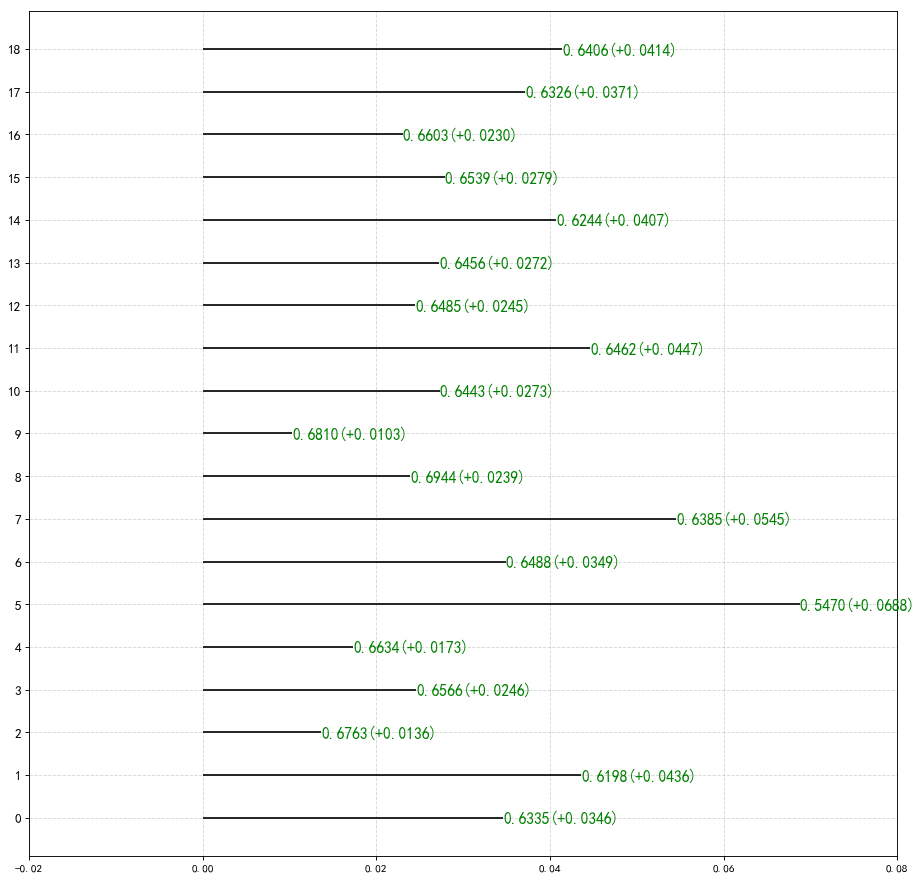

In [948]:
colors = ['red' if f < 0 else 'green' for f in gfs]
plt.figure(figsize=(14, 14), dpi=80)
plt.hlines(y=epoch_list, xmin=0, xmax=gfs)
for x, y, tex, f in zip(gfs, epoch_list, gfs, mfs):
    t = plt.text(x, y, '{:.4f}({:+.4f})'.format(f, tex), ha='right' if x < 0 else 'left', va='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})
plt.yticks(epoch_list, epoch_list, fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-0.02, round(max(gfs), 2) + 0.01)
plt.show()